<a href="https://colab.research.google.com/github/ash0411/fiw/blob/main/fiwVisulalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from glob import glob
from collections import defaultdict
from math import ceil 

In [4]:
# downloading the dataset from kaggle 
!rmdir /root/.kaggle
!mkdir /root/.kaggle
!cp kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c recognizing-faces-in-the-wild

rmdir: failed to remove '/root/.kaggle': Directory not empty
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/1.47k [00:00<?, ?B/s]
100% 1.47k/1.47k [00:00<00:00, 2.26MB/s]
  0% 0.00/8.67k [00:00<?, ?B/s]
100% 8.67k/8.67k [00:00<00:00, 8.83MB/s]
  0% 0.00/354k [00:00<?, ?B/s]
100% 354k/354k [00:00<00:00, 50.4MB/s]
 41% 11.0M/27.1M [00:00<00:00, 111MB/s]
100% 27.1M/27.1M [00:00<00:00, 133MB/s]
 94% 32.0M/34.1M [00:00<00:00, 103MB/s] 
100% 34.1M/34.1M [00:00<00:00, 167MB/s]
 76% 52.0M/68.6M [00:00<00:00, 98.5MB/s]
100% 68.6M/68.6M [00:00<00:00, 147MB/s] 
  0% 0.00/77.6k [00:00<?, ?B/s]
100% 77.6k/77.6k [00:00<00:00, 77.8MB/s]
  0% 0.00/156k [00:00<?, ?B/s]
100% 156k/156k [00:00<00:00, 140MB/s]
100% 29.7M/29.7M [00:00<00:00, 91.4MB/s]

  0% 0.00/33.7k [00:00<?, ?B/s]
100% 33.7k/33.7k [00:00<00:00, 21.4MB/s]
 93% 104M/111M [00:02<00:00, 46.0MB/s] 
100% 111M/111M [00:02<00:00, 43.7MB/s]
 96% 125M/130M [00:00<00:00, 114MB/s]
100% 130M/130M [00:00<00:00, 141MB/s]


In [136]:
#unzipping the training and testing zip file 
import os
!mkdir face
!unzip 'train.zip' -d '/content/face/train'
!unzip 'test.zip' -d '/content/face/test'

In [6]:
# reading the training relationships file
df = pd.read_csv('train_relationships.csv')
df.describe()

,p1,p2
count,3598,3598
unique,1725,1439
top,F0825/MID5,F0020/MID10
freq,9,8


In [7]:
# helper function for scanning the image
def img_scan(path):
    img = image.load_img(path, target_size=(224, 224))
    img = np.array(img).astype(np.float)
    return img

In [8]:
# finding the number of families in training and putting them in a list
train_url =  '/content/face/train/'
family = os.listdir(train_url)
print('the number of families are {}'.format(len(family)))
print(family[:10])

the number of families are 470
['F0816', 'F0245', 'F0903', 'F0997', 'F0769', 'F0832', 'F0971', 'F0227', 'F0122', 'F0850']


the number of pictures in the testing set are  6282


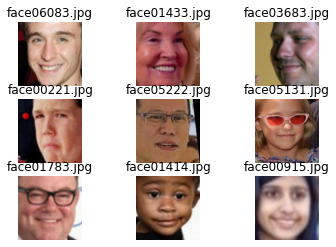

In [9]:
#finding the number of families in the test case and putting them in a list
test_url =  '/content/face/test/'
family_pics = os.listdir(test_url)
print("the number of pictures in the testing set are  {}".format(len(family_pics)))
#displaying some of the images in test set
for i in range(9):
  img = img_scan(test_url + family_pics[i])
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(img.astype("uint8"))
  plt.title(family_pics[i])
  plt.axis('off')

In [10]:
# to list out all the members of a particular family
members = {i:sorted(os.listdir(train_url+i)) for i in family}
member_count = 0
# computing member counts
member_count_per_family = []
for i in members:
  member_count_per_family.append(len(members[i]))
  member_count += len(members[i])
print('The total number of people in the training dataset are {}'.format(member_count))

The total number of people in the training dataset are 2318


In [136]:
print('the average number of people in a family is {} for the training dataset'.format(ceil(member_count/len(family))))

the average number of people in a family is 5 for the training dataset


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # Remove the CWD from sys.path while we load stuff.


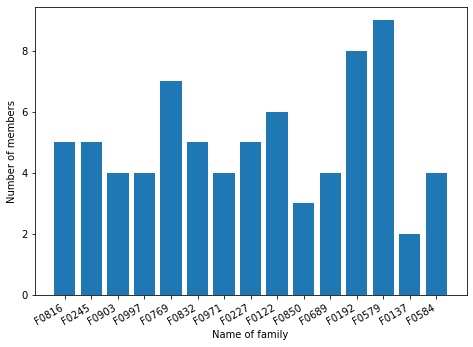

In [12]:
# this is a bar graph of the first 15 families 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = family[:15]
number = member_count_per_family[:15]
plt.xlabel('Name of family')
plt.ylabel('Number of members')
ax.bar(names,number)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
fig.tight_layout()

In [13]:
# making a dictionary of member count and family
my_dict = {}
my_dict['family_name'] = family
my_dict['member_count'] = member_count_per_family

In [14]:
# making a dataframe of the family, member count
family_member_df =pd.DataFrame.from_dict(my_dict,orient='index').transpose()
family_member_df.head()

,family_name,member_count
0,F0816,5
1,F0245,5
2,F0903,4
3,F0997,4
4,F0769,7


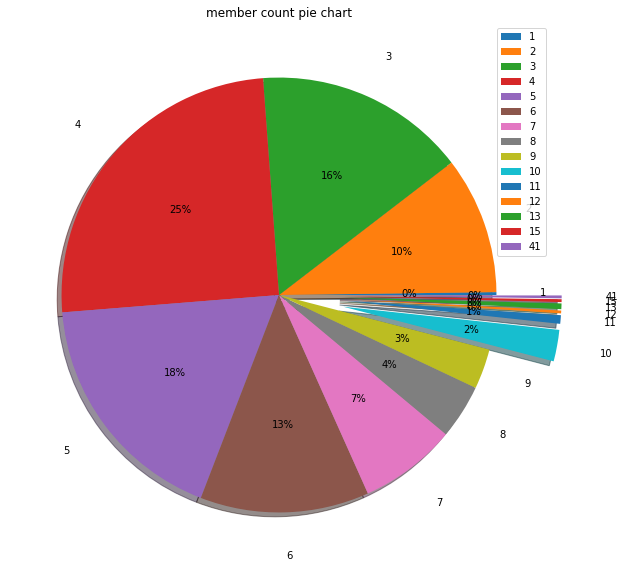

In [84]:
# grouping the family member count table according to member count
mem = family_member_df.groupby('member_count').size().to_frame().reset_index()
# plotting a pie chart representing the share of families having different member counts
x = mem[0]
labels = mem['member_count'] 
explode = [0, 0, 0, 0, 0,0,0,0,0,0.3,0.3,0.3,0.3,0.3,0.3]
fig, ax = plt.subplots(figsize = (10,10))
ax.pie(x, labels = labels, autopct='%.0f%%', explode = explode, shadow = True,labeldistance= 1.2)
ax.set_title('member count pie chart')
ax.legend()
plt.show()

In [58]:
# family F0601 has the highest count of members
family_member_df[family_member_df['member_count'] == 41]

,family_name,member_count
292,F0601,41


In [86]:
# scanning all the images in the family
family_set_images = glob(train_url + "*/*/*.jpg")
print('The total number of images in the training dataset are {} '.format(len(family_set_images)))

The total number of images in the training dataset are 12379 


In [135]:
# computing family_member
family_member = []
for x in family_set_images:
  a = x.split('/')[-3] + '/' + x.split('/')[-2]
  if a in family_member:
    continue
  else:
    family_member.append(a) 

member_picture = {i:sorted(os.listdir(train_url+i)) for i in family_member}
print('the average number of pictures of a person is {} for the training dataset'.format(ceil(len(family_set_images)/member_count)))

the average number of pictures of a person is 6 for the training dataset


In [88]:
picture_count_per_member = []
for i in member_picture:
  picture_count_per_member.append(len(member_picture[i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # Remove the CWD from sys.path while we load stuff.


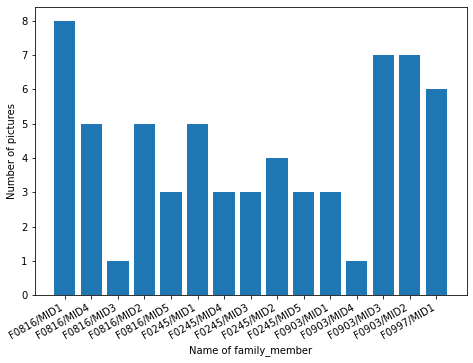

In [91]:
# this is a bar graph of the first 10 families 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = family_member[:15]
number = picture_count_per_member[:15]
plt.xlabel('Name of family_member')
plt.ylabel('Number of pictures')
ax.bar(names,number)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
fig.tight_layout()

In [92]:
# making a dictionary of family,member and picture count
my_dict1 = {}
my_dict1['family_member'] = family_member
my_dict1['picture_count'] = picture_count_per_member

In [116]:
# making a dataframe of the family_member image count
family_member_image_df =pd.DataFrame.from_dict(my_dict1,orient='index').transpose()

In [119]:
# grouping the family_member picture count table according to member count
mem1 = family_member_image_df.groupby('picture_count').size().reset_index()

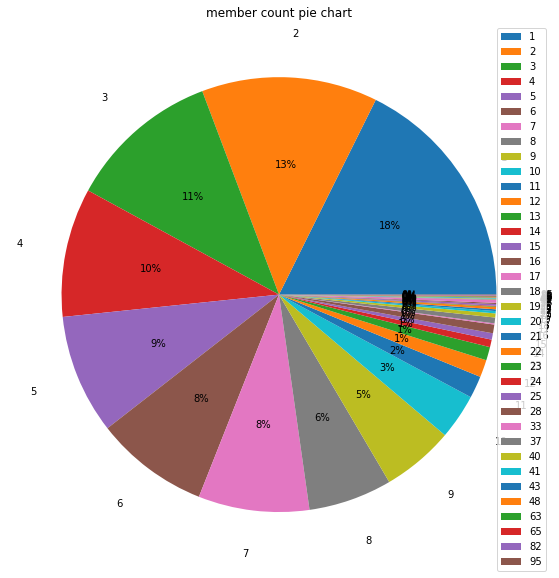

In [122]:
x = mem1[0]
labels = mem1['picture_count']  
fig, ax = plt.subplots(figsize = (10,10))
ax.pie(x, labels = labels, autopct='%.0f%%',labeldistance= 1.2)
ax.set_title('member count pie chart')
ax.legend()
plt.show()

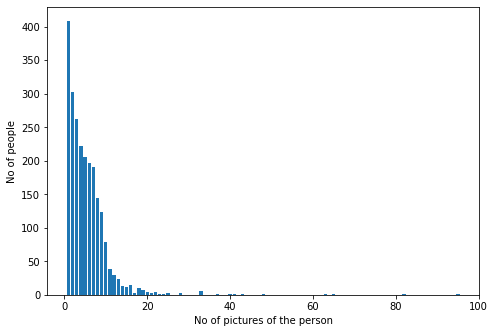

In [129]:
# plotting the bar graph for 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = mem1['picture_count']  
labels = mem1[0]
ax.bar(x,labels)
plt.xlabel('No of pictures of the person')
plt.ylabel('No of people')
plt.show()

In [130]:
# reading the results from the drive 
vgg_df = pd.read_excel('vgg_face_accuracy.xlsx')
vgg_senet_df = pd.read_excel('vgg_senet_accuracy.xlsx')

In [131]:
vgg_df.head()

,epoch,training_acc,validation_acc
0,10,80.22,75.400
1,11,82.00,75.500
2,12,83.17,77.844
3,13,83.44,77.844
4,14,83.84,78.031


In [132]:
# taking out the percentage of training and testing accuracy
vgg_senet_df['training_acc'] = vgg_senet_df['training_acc'] * 100
vgg_senet_df['val_acc'] = vgg_senet_df['val_acc'] * 100
vgg_senet_df.head()

,#epoch,training_acc,val_acc
0,1,58.11,59.688
1,2,65.42,61.594
2,3,69.64,69.250
3,4,73.62,71.406
4,5,74.75,72.000


[]

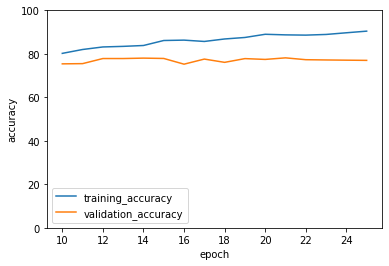

In [133]:
# plotting line graph for vgg facenet model using resnet50
ax = plt.gca()
ax.set_ylim([0,100])
plt.plot(vgg_df['epoch'],vgg_df['training_acc'])
plt.plot(vgg_df['epoch'],vgg_df['validation_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
ax.legend(['training_accuracy','validation_accuracy'])
plt.plot()

[]

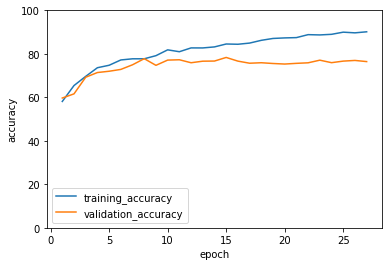

In [134]:
# plotting line graph for vgg facenet model using senet
ax = plt.gca()
ax.set_ylim([0,100])
plt.plot(vgg_senet_df['#epoch'],vgg_senet_df['training_acc'])
plt.plot(vgg_senet_df['#epoch'],vgg_senet_df['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
ax.legend(['training_accuracy','validation_accuracy'])
plt.plot()